In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

# Enable inline plotting (only needed for Jupyter Notebook)
%matplotlib inline

### Inspecting our Dataset

In [2]:
# Define the path to the dataset file
data_path = '../data/quark-gluon_data-set_n139306.hdf5' 

# Open the HDF5 file and list its top-level keys
with h5py.File(data_path, 'r') as f:
    keys = list(f.keys())
    print("Top-level keys in the HDF5 file:", keys)

Top-level keys in the HDF5 file: ['X_jets', 'm0', 'pt', 'y']


In [3]:
# Open the file to inspect the shapes and types of the data arrays
with h5py.File(data_path, 'r') as f:
    # Check the shape of each dataset
    x_jets_shape = f['X_jets'].shape
    m0_shape = f['m0'].shape
    pt_shape = f['pt'].shape
    y_shape = f['y'].shape
    
    print("Shape of X_jets:", x_jets_shape)
    print("Shape of m0:", m0_shape)
    print("Shape of pt:", pt_shape)
    print("Shape of y:", y_shape)

Shape of X_jets: (139306, 125, 125, 3)
Shape of m0: (139306,)
Shape of pt: (139306,)
Shape of y: (139306,)


This basically tells that we have:
- **Number of Samples:**  
    139,306 jet events.

- **Image Data (X_jets):**  
  Each event is represented as a 125×125 image with 3 channels. This likely corresponds to the three detector components (ECAL, HCAL, Tracks).

- **Additional Arrays (m0, pt, y):**  
  Each of these arrays has a single value per jet event. For example:
  - **m0:** Could be the invariant mass of the jet.
  - **pt:** Likely represents the transverse momentum.
  - **y:** May be a label (e.g., quark vs. gluon) or another physics parameter like rapidity.

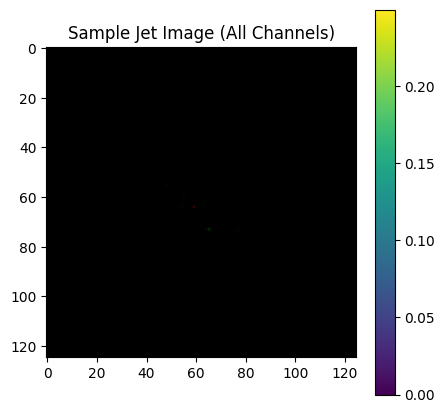

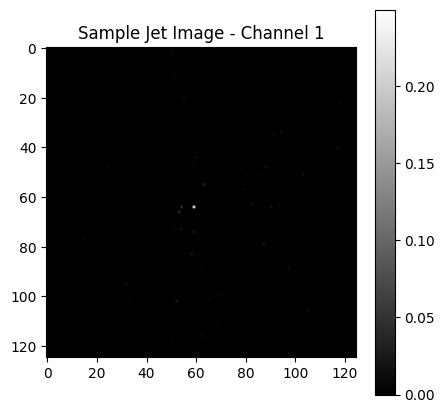

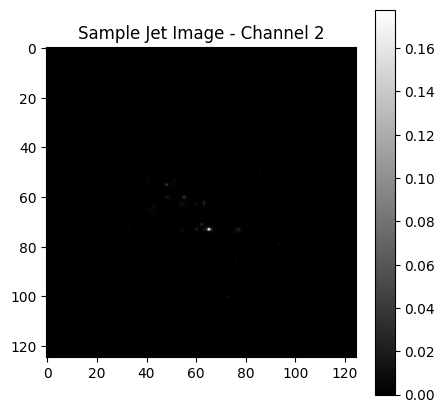

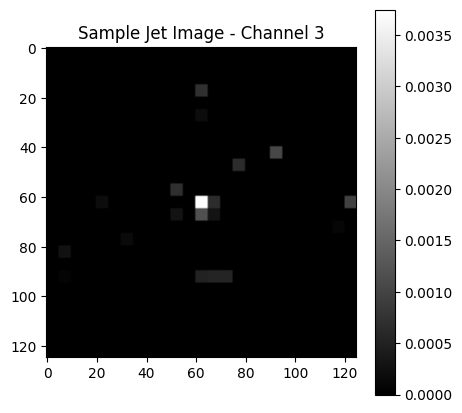

In [5]:
# Open the file to extract a sample jet image from X_jets
with h5py.File(data_path, 'r') as f:
    x_jets = f['X_jets']
    sample_image = x_jets[0]  # Select the first sample

# Plot the full sample image
plt.figure(figsize=(5, 5))
plt.imshow(sample_image)
plt.title('Sample Jet Image (All Channels)')
plt.colorbar()
plt.show()

# Plot each channel separately
channels = ['Channel 1', 'Channel 2', 'Channel 3']
for i in range(3):
    plt.figure(figsize=(5, 5))
    plt.imshow(sample_image[:, :, i], cmap='gray')
    plt.title(f'Sample Jet Image - {channels[i]}')
    plt.colorbar()
    plt.show()

In [6]:
with h5py.File(data_path, 'r') as f:
    m0 = f['m0'][:]
    pt = f['pt'][:]
    y = f['y'][:]

# Print summary statistics
print("m0: min =", m0.min(), ", max =", m0.max(), ", mean =", m0.mean(), ", std =", m0.std())
print("pt: min =", pt.min(), ", max =", pt.max(), ", mean =", pt.mean(), ", std =", pt.std())
print("y: min =", y.min(), ", max =", y.max(), ", mean =", y.mean(), ", std =", y.std())

m0: min = 3.3729308 , max = 75.95049 , mean = 21.39222 , std = 6.4316497
pt: min = 70.11005 , max = 337.05173 , mean = 117.12393 , std = 26.067795
y: min = 0.0 , max = 1.0 , mean = 0.5 , std = 0.5


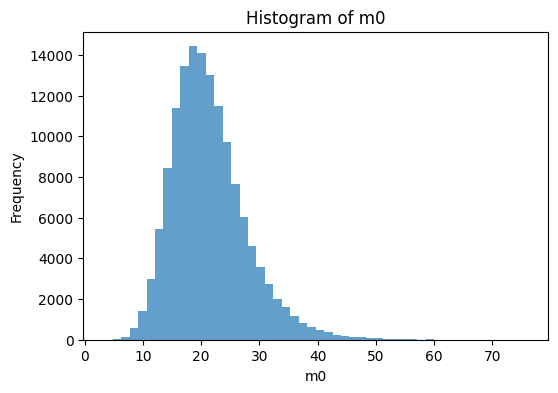

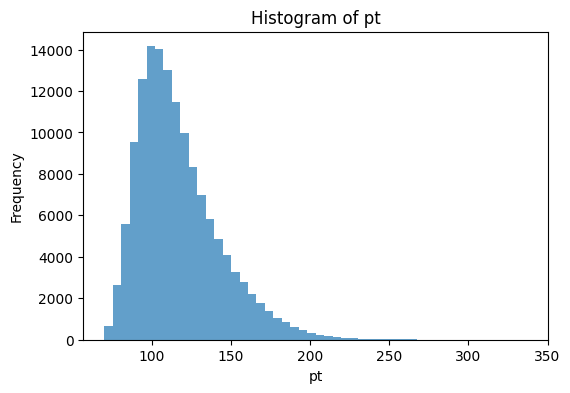

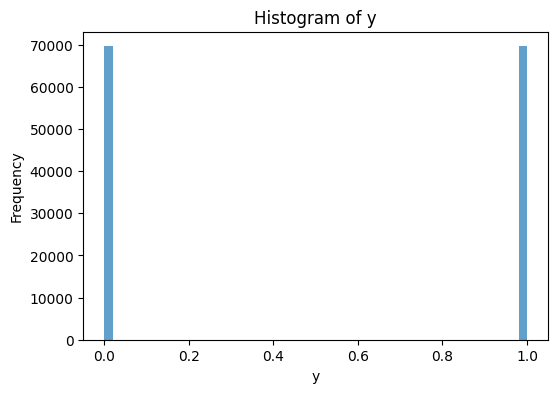

In [7]:
# Plot histograms to inspect the distributions
plt.figure(figsize=(6, 4))
plt.hist(m0, bins=50, alpha=0.7)
plt.title('Histogram of m0')
plt.xlabel('m0')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(6, 4))
plt.hist(pt, bins=50, alpha=0.7)
plt.title('Histogram of pt')
plt.xlabel('pt')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(6, 4))
plt.hist(y, bins=50, alpha=0.7)
plt.title('Histogram of y')
plt.xlabel('y')
plt.ylabel('Frequency')
plt.show()

In [8]:
unique_y = np.unique(y)
print("Unique values in y:", unique_y)

Unique values in y: [0. 1.]


In [11]:
# How many of each class do we have:
unique, counts = np.unique(y, return_counts=True)
print(dict(zip(unique, counts)))

{0.0: 69653, 1.0: 69653}


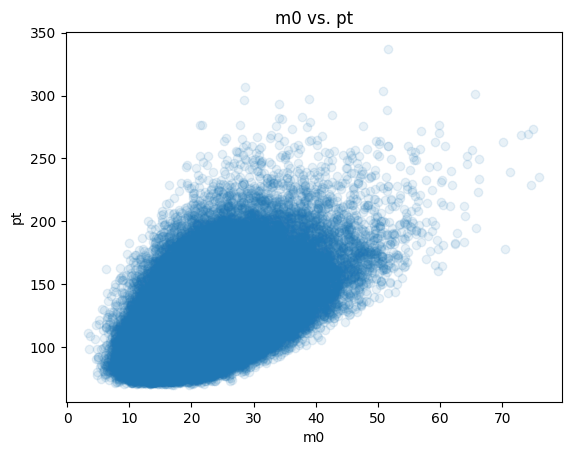

In [10]:
# What is the relationship between m0 and pt:
plt.scatter(m0, pt, alpha=0.1)
plt.xlabel("m0")
plt.ylabel("pt")
plt.title("m0 vs. pt")
plt.show()

In [18]:
# Is there a linear correlation between them?
corr_matrix = np.corrcoef([m0, pt])
print("Correlation matrix between m0 and pt:\n", corr_matrix)

Correlation matrix between m0 and pt:
 [[1.         0.54090738]
 [0.54090738 1.        ]]


In [12]:
# Check NaN in m0, pt, y
print("NaN in m0:", np.isnan(m0).sum())
print("NaN in pt:", np.isnan(pt).sum())
print("NaN in y:", np.isnan(y).sum())

# (Optional) If you'd like to read in X_jets to memory for checks (be cautious with memory usage):
with h5py.File(data_path, 'r') as f:
    X_jets_full = f['X_jets'][:]  # loads everything into RAM

print("NaN in X_jets:", np.isnan(X_jets_full).sum())

NaN in m0: 0
NaN in pt: 0
NaN in y: 0
NaN in X_jets: 0


In [14]:
# Checking for unexpected values:
print("Any negative m0?", np.any(m0 < 0))
print("Any negative pt?", np.any(pt < 0))
print("Any negative pixel in X_jets?", np.any(X_jets_full < 0))

Any negative m0? False
Any negative pt? False
Any negative pixel in X_jets? False


In [16]:
# Gathering Pixel Stats Per Channel
channel_stats = {}
for i in range(3):
    channel_pixels = X_jets_full[..., i].flatten()  # Flatten the i-th channel
    channel_stats[i] = {
        'min': channel_pixels.min(),
        'max': channel_pixels.max(),
        'mean': channel_pixels.mean(),
        'std': channel_pixels.std()
    }

for chan_idx, stats in channel_stats.items():
    print(f"Channel {chan_idx} => Min: {stats['min']:.4f}, "
          f"Max: {stats['max']:.4f}, Mean: {stats['mean']:.4f}, "
          f"Std: {stats['std']:.4f}")

Channel 0 => Min: 0.0000, Max: 756.5963, Mean: 0.0001, Std: 0.0190
Channel 1 => Min: 0.0000, Max: 9.3341, Mean: 0.0001, Std: 0.0020
Channel 2 => Min: 0.0000, Max: 0.4328, Mean: 0.0000, Std: 0.0005


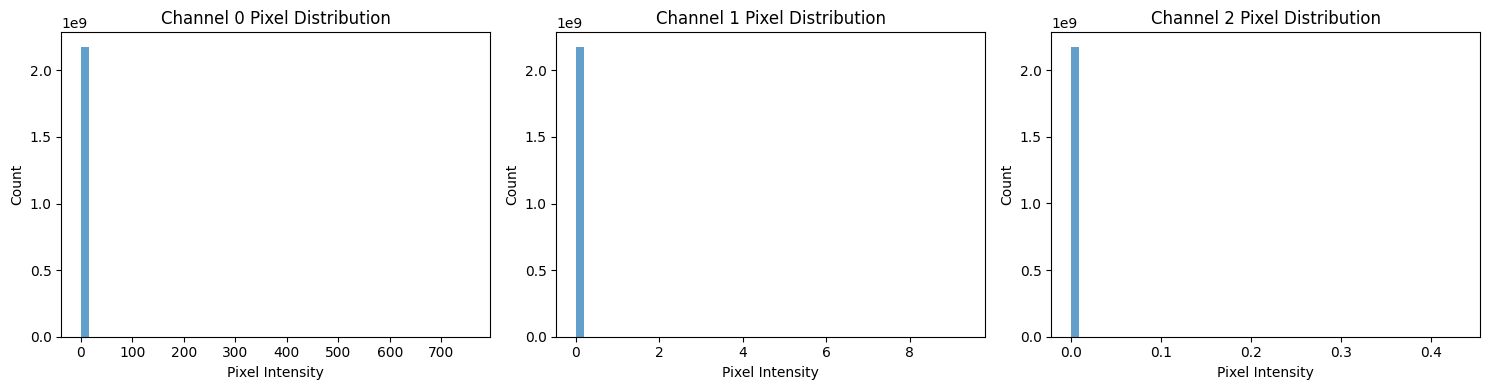

In [19]:
# Plot histograms per channel:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for i in range(3):
    channel_pixels = X_jets_full[..., i].flatten()
    axes[i].hist(channel_pixels, bins=50, alpha=0.7)
    axes[i].set_title(f'Channel {i} Pixel Distribution')
    axes[i].set_xlabel('Pixel Intensity')
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()